In [21]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as spy
import keras
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input
from keras.optimizers import Adam,RMSprop
df = pd.read_csv('winequality-white.csv')

Olhando abaixo, não temos nenhum valor N/A, então não precisamos tratar isso.

In [2]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
print(len(df))
df

4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Podemos ver abaixo que existem muitos outliers, não só nessa coluna, mas em várias outras.Vou tentar usar um método para remover os outliers dessa, depois tento remover os das restantes com o mesmo método.

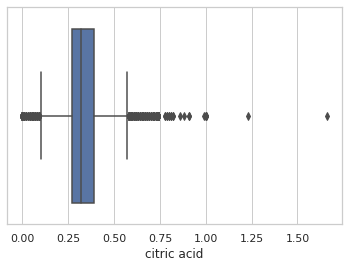

In [5]:
sb.set_theme(style="whitegrid")
ax = sb.boxplot(x=df['citric acid'])

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

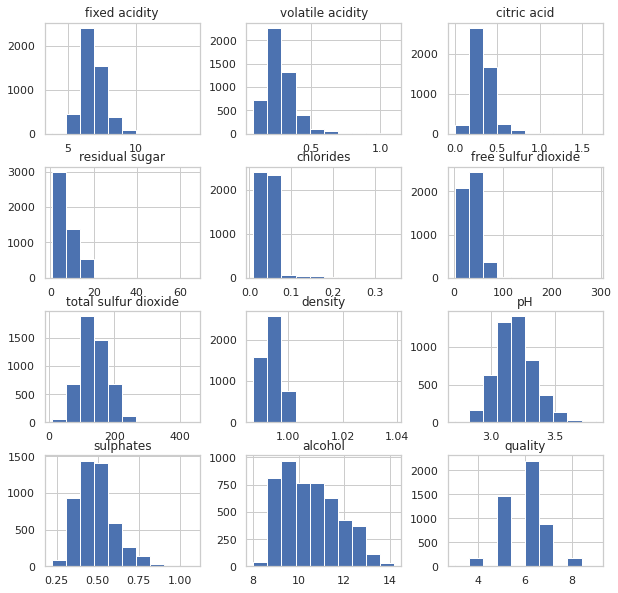

In [6]:
df.hist(figsize = (10, 10))

In [7]:
#spy.stats.zscore(df)
cols = list(df.columns)
df[cols]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Vou filtrar os outliers do dataset por meio do zscores. Os outliers são definidos como os valores que estão acima de 3 desvios padrões da média. Logo abaixo eu removo eles

In [8]:
zscores = spy.stats.zscore(df[cols], nan_policy='omit')
abs_zscores = np.abs(zscores)
filtered_entries = (abs_zscores < 3).all(axis=1)
new_df = df[filtered_entries]
df = new_df

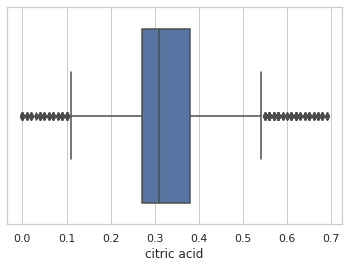

In [9]:
ax = sb.boxplot(x=df['citric acid'])

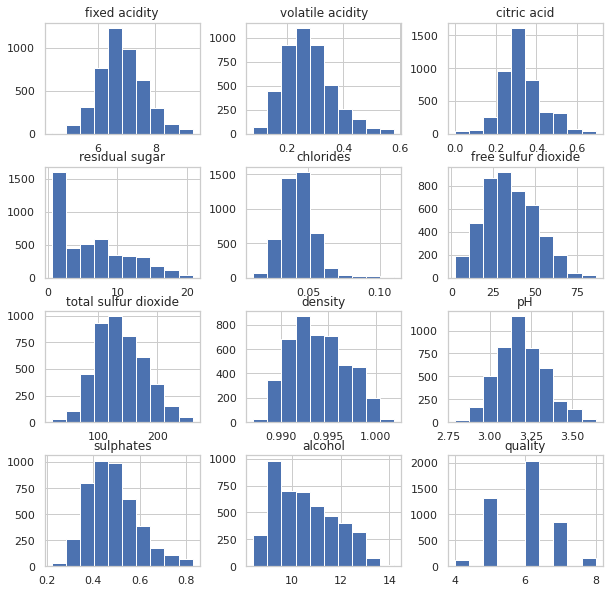

In [10]:
df.hist(figsize = (10, 10));

Podemos ver abaixo que remover os outliers retirou várias amostras do nosso dataset. Porém, ele ficou mais igualmente distribuído. A quantidade amostrar anteriormente era de 4898 linhas, e agora é de 4487 linhas.

In [11]:
len(df)

4487

Logo abaixo, podemos ver que esse datast é bem desbalanceado. Tem muitas amostras regulares (sendo elas de qualidade 5,6,7) e poucas amostras ruins (4), assim como poucas amostras boas (9)

In [19]:
y=df['quality']
y.value_counts()

6    2038
5    1309
7     855
8     161
4     124
Name: quality, dtype: int64

Mapa de correlação

<AxesSubplot:>

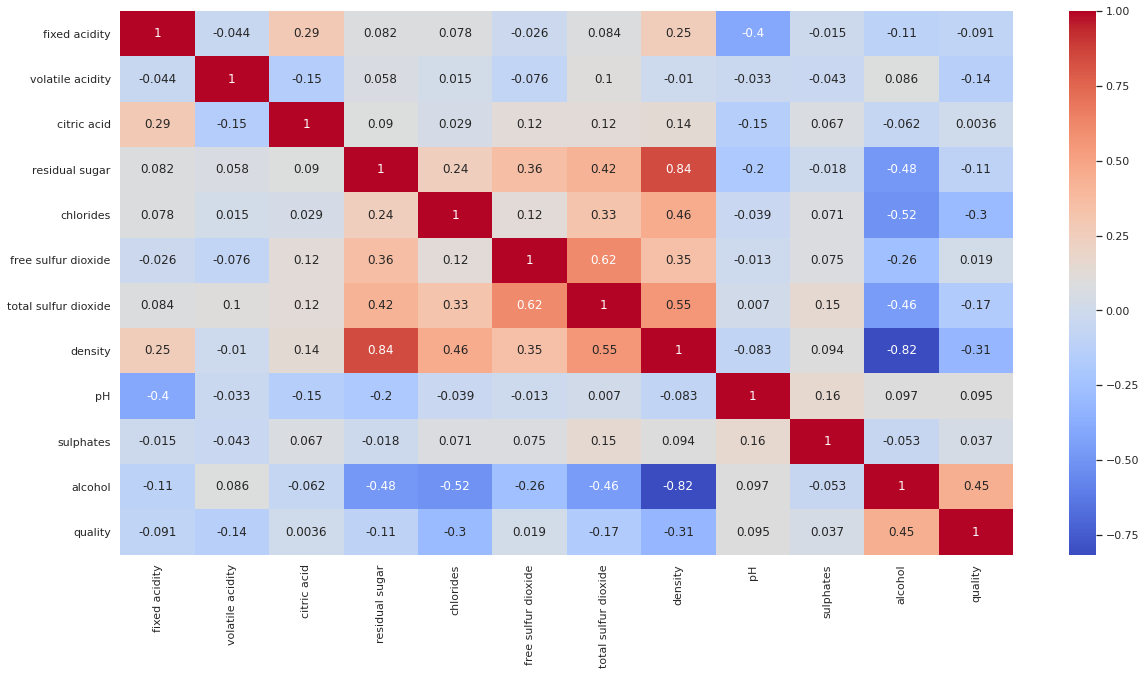

In [15]:
corr=df.corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr,annot=True, cmap='coolwarm')

Vamos adicionar mais uma coluna chamada `level`no dataset, que vai representar o nível de qualidade do vinho, assim como está no artigo. Se a o campo na coluna `quality` for <= 5 a qualidade é baixa, se for entre > 5 e < 7 a qualidade é regular e se for >= 7 a qualidade é alta:

In [12]:
def create_level(x):
    # function to create levels basis wine quality
    if x <= 5:
        x = "baixa"
    elif x > 5 and x < 7:
        x = "regular"
    else:
        x = "alta"
    return x
df['level'] = df['quality'].apply(lambda x: create_level(x))
df.head(10)

/tmp/ipykernel_12127/4192856052.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'] = df['quality'].apply(lambda x: create_level(x))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,level
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,regular
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,regular
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,regular
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,regular
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,regular
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,regular
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,regular
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,regular
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,regular
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,regular


Também quero codificar essas qualidades numericamente:

Não utilizamos o álcool para o treinamento.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:11],test_size=0.20,random_state=21)
print('Formato do dataset de treinamento Xs:{}'.format(X_train.shape))
print('Formato do datasett de teste Xs:{}'.format(X_test.shape))
print('Formato do dataset de treino y:{}'.format(y_train.shape))
print('Formato do dataset de test y:{}'.format(y_test.shape))
y_train

ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:
dimension = X_train.shape[1]
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=dimension, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=10)

<h2>avaliação do resultado: </h2>

In [ ]:
mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)
print(mse_value)
y_pred = model.predict(X_test)

In [ ]:
#R2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)